In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from scipy import optimize



w0 = 2.14

d = np.array([0.21, 0.36, 0.34])

w1 = 2*np.pi*np.array([150,195,240,285,328,329,330,331,332,375,420,465,510,555])/1000
w2 = 2*np.pi*np.array([150,195,240,295,320,330,333,335,339,340,385,430,475,520,570])/1000
w3 = 2*np.pi*np.array([150,195,240,285,295,300,303,305,309,330,375,420,465,510,555])/1000

w = np.array([w1, w2, w3])


def pha(i):
    z = np.arctan(2*d[i]*w[i]/(w0**2-w[i]**2))
    for k in range(len(z)):
        if 0 < z[k] < np.pi:
            z[k] = z[k]
        else:
            z[k] = z[k]+np.pi
    return z




def test_func(x, a, b, c):
    return np.arctan(a*x-c*2) + b

params_1, params_covariance = optimize.curve_fit(test_func, w1/w0, pha(0),
                                               p0=[0.1,0.1,0])
params_2, params_covariance = optimize.curve_fit(test_func, w2/w0, pha(1),
                                               p0=[0.1,0.1,0])
params_3, params_covariance = optimize.curve_fit(test_func, w3/w0, pha(2),
                                               p0=[0.1,0.1,0])

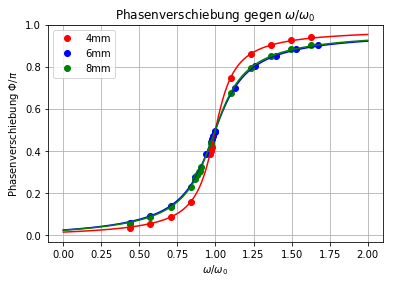

In [36]:
plt.plot(w1/w0, pha(0)/np.pi, 'ro', label='4mm')
plt.plot(w2/w0, pha(1)/np.pi, 'bo', label='6mm')
plt.plot(w3/w0, pha(2)/np.pi, 'go', label='8mm')

x = np.linspace(0, 2, 1000)

plt.plot(x,test_func(x, params_1[0], params_1[1],params_1[2])/np.pi, 'r')
plt.plot(x,test_func(x, params_2[0], params_2[1],params_2[2])/np.pi, 'b')
plt.plot(x,test_func(x, params_3[0], params_3[1],params_3[2])/np.pi, 'g')

plt.grid('True')
plt.xlabel(r'$\omega / \omega_0$')
plt.ylabel(r'Phasenverschiebung $\Phi / \pi$')
plt.title(r'Phasenverschiebung gegen $\omega/\omega_0$')
plt.legend(loc='upper left')
plt.savefig('penis.png')



plt.show()